# Ex03 - wet

In [1]:
import os
import pandas as pd

from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf

import warnings
warnings.filterwarnings('ignore')


project_path = os.path.dirname(os.getcwd())


grid_input_file_name = project_path + "/data/Grid_input/ex03_grid.csv"

ic_input_file_name = project_path + "/data/Grid_input/ex03_ic_wet.csv"

parameter_input_file_name = project_path + "/data/Grid_input/Richards_VG.csv"

dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"

grid_type = 'classical'

dz_min = -9999 # not required for grid_type = 'classical'

dz_max = -9999 # not required for grid_type = 'classical'

b = -9999      # not required for grid_type = 'classical'

psi_interp_model = "linear"

T_interp_model = "linear"

water_ponding_0 = -3.0

T_water_ponding_0 = 273.15

output_file_name =  project_path + "/data/Grid_NetCDF/ex03_grid.nc"

output_title = '''Computational grid for ex04.
                  '''
output_summary = '''

'''

output_date = ''

output_institution = 'GEOframe'



In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.style as style 
import matplotlib.colors as cl
import matplotlib.dates as mdates
import matplotlib
from geoframepy.timeseries import io_csv
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        "text.usetex": False,
        "font.family": "serif",
        "axes.labelsize": 16,
        "font.size": 16,
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#f7fbff','#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6','#2171b5','#08519c','#08306b'])
colors = ['#d53e4f','#fc8d59','#e9a3c9','#99d594','#3288bd','#313695']
plt.rcParams.update(nice_fonts)

In [3]:
# si può specificare una mappa di colori definiti in modo discreto
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#f7fbff','#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6','#2171b5','#08519c','#08306b'])
os.chdir(os.path.join(os.getcwd(), "..", "output"))
#sito: colorbrewer 2.0
os.getcwd()

'C:\\Users\\emmat\\Desktop\\Progetto idrologia\\OMS_WHETGEO1D\\output'

In [4]:
ds = xr.open_dataset("ex03_wet_0000.nc")
ds.keys

<bound method Mapping.keys of <xarray.Dataset>
Dimensions:           (depth: 601, dualDepth: 601, time: 288)
Coordinates:
  * depth             (depth) float64 -2.998 -2.993 -2.988 ... -0.0025 0.0
  * dualDepth         (dualDepth) float64 -3.0 -2.995 -2.99 ... -0.01 -0.005 0.0
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-01-01T23:55:00
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex03 wet initial condition.
  

In [5]:
ds

<xarray.Dataset>
Dimensions:           (depth: 601, dualDepth: 601, time: 288)
Coordinates:
  * depth             (depth) float64 -2.998 -2.993 -2.988 ... -0.0025 0.0
  * dualDepth         (dualDepth) float64 -3.0 -2.995 -2.99 ... -0.01 -0.005 0.0
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-01-01T23:55:00
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex03 wet initial condition.
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom Dirichlet
    path_top_boundary_condition:        C:\Users\Niccolo\OMS\OMS_Project_WHET...
    path_bottom_boundary_condition:     C:\Users\Niccolo\OMS\OMS_Project_WHET...
    path_grid:                          C:\Users\Niccolo\OMS\OMS_Project_WHET...
    time_delta:                          
    swrc_model:                         {Water Depth,Van Genuchten}
    soil_hydraulic_conductivity_model:  {null,Mualem Van Genuchten}
    interface_conductivity_model:       max

In [6]:
rain = io_csv.pandas_read_OMS_timeseries(project_path + '/data/Timeseries/ex03_rainfall.csv',datetime_index=True)
rain

,0
Datetime,
2020-01-01 00:00:00,0.0
2020-01-01 00:05:00,0.0
2020-01-01 00:10:00,0.0
2020-01-01 00:15:00,0.0
2020-01-01 00:20:00,0.0
...,...
2020-01-02 23:35:00,0.0
2020-01-02 23:40:00,0.0
2020-01-02 23:45:00,0.0


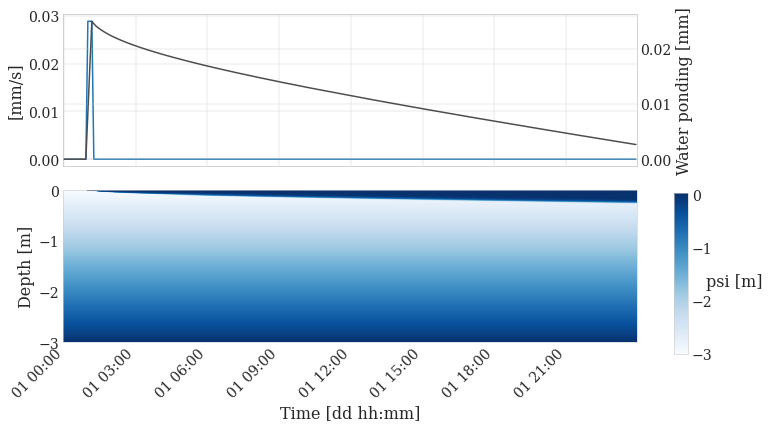

In [7]:
fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

ax[0].plot(ds.time.values, rain['0'][0:288]/300)
ax[0].set_ylabel('[mm/s]')

ax1=ax[0].twinx()
ds.waterVolume.sel(depth=0.0, method='nearest').plot(ax=ax1,color='0.3')
ax1.set_ylabel('Water ponding [mm]')
ax1.set_title(None)


a = ds.psi.plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})

ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh:mm]')


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax[1].xaxis.set_tick_params(rotation=45)

cbar_ax = fig.add_axes([0.95, 0.19, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('psi [m]', rotation=0, labelpad=22)

plt.tight_layout()
plt.show()

In azzurro: intensità di pioggia; mentre linea nera: volume di acqua che si accumula in superficie (water ponding): quando inizia a piovere (corrispondente al picco azzurro) parte dell'acqua si infiltra, però la maggior parte del volume di pioggia si accumula in superficie.

Quando la pioggia finisce, il volume d'acqua raggiunge il suo massimo e man mano inizia a calare e infiltrarsi nel suolo.

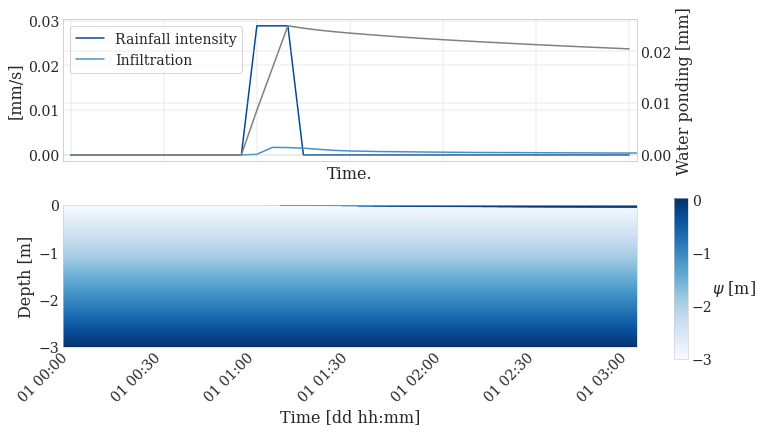

In [8]:
start = '2020-01-01 00:00'
end = '2020-01-01 03:00'

fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

ax[0].plot(ds.time.sel(time=slice(start,end)), rain['0'][start:end]/300,  color='#084594', label='Rainfall intensity')
(-ds.darcyVelocity.sel(dualDepth=0, method='nearest')*1000).plot(ax=ax[0], color='#4292c6', label='Infiltration')

ax[0].set_ylabel('[mm/s]')
ax[0].set_title(None)
ax[0].legend(loc='upper left')

ax1=ax[0].twinx()
ds.waterVolume.sel(time=slice(start,end)).sel(depth=0.0, method='nearest').plot(ax=ax1,color='0.5')
ax1.set_ylabel('Water ponding [mm]')
ax1.set_title(None)


a = ds.psi.sel(time=slice(start,end)).plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})

ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh:mm]')


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax[1].xaxis.set_tick_params(rotation=45)

cbar_ax = fig.add_axes([0.95, 0.19, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

plt.tight_layout()
plt.show()

Questo è un dettaglio del grafico visto sopra: in blu l'intensità della pioggia (J); mentre in azzurro la velocità del flusso d'acqua all'interfaccia: quello che si vede è che come la pioggia inizia, l'infiltrazinoe è prossima a zero mentre intensità di pioggia 0.03 mm/s, di conseguenza per questo squilibrio tra quello che precipita e che entra nel suolo abbiamo un accumulo d'acqua in superficie. come la pioggia smette, il volume d'acqua non cresce più e si inizia a infiltrare nel suolo.

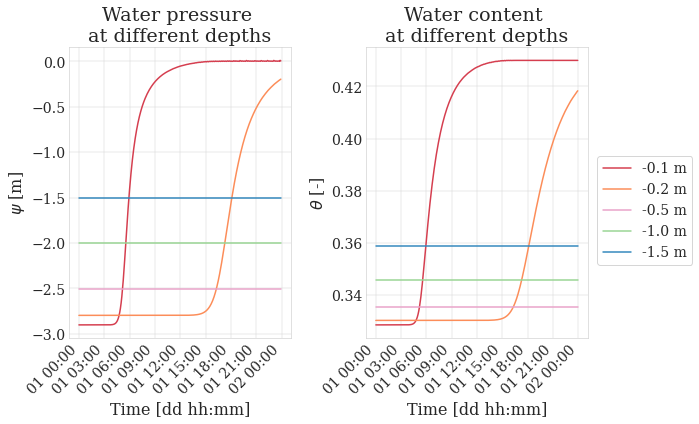

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10/1.618)) 

ds.psi.sel(depth=-0.1,  method='nearest').plot(ax=ax1, color=colors[0])
ds.psi.sel(depth=-0.2,  method='nearest').plot(ax=ax1, color=colors[1])
ds.psi.sel(depth=-0.5,  method='nearest').plot(ax=ax1, color=colors[2])
ds.psi.sel(depth=-1.0,  method='nearest').plot(ax=ax1, color=colors[3])
ds.psi.sel(depth=-1.5,  method='nearest').plot(ax=ax1, color=colors[4])


ax1.set_title('Water pressure \nat different depths')


ax1.set_ylabel('$\psi$ [m]')
ax1.set_xlabel('Time [dd hh:mm]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax1.xaxis.set_tick_params(rotation=45)

ds.theta.sel(depth=-0.1, method='nearest').plot(ax=ax2, label = '-0.1 m', color=colors[0])
ds.theta.sel(depth=-0.2, method='nearest').plot(ax=ax2, label = '-0.2 m', color=colors[1])
ds.theta.sel(depth=-0.5, method='nearest').plot(ax=ax2, label = '-0.5 m', color=colors[2])
ds.theta.sel(depth=-1.0, method='nearest').plot(ax=ax2, label = '-1.0 m', color=colors[3])
ds.theta.sel(depth=-1.5, method='nearest').plot(ax=ax2, label = '-1.5 m', color=colors[4])

ax2.set_title('Water content \nat different depths')


ax2.set_ylabel('$\\theta$ [-]')
ax2.set_xlabel('Time [dd hh:mm]')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax2.xaxis.set_tick_params(rotation=45)

ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

fig 1: curva sempre più arrotondata, ma non discontinuità particolari;


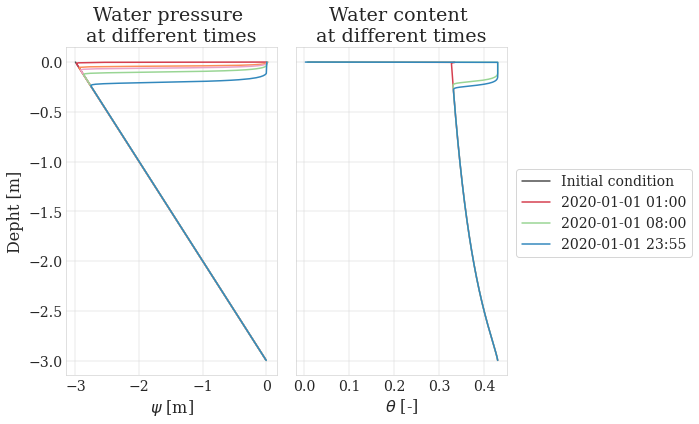

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(10, 10/1.618)) 

ds.psiIC.plot(ax=ax1, y='depth', label='Initial condition', color='0.3')
ds.psi.sel(time='2020-01-01 01:00').plot(ax=ax1, y='depth', label='2020-01-01 01:00', color=colors[0])
ds.psi.sel(time='2020-01-01 02:00').plot(ax=ax1, y='depth', label='2020-01-01 02:00', color=colors[1])
ds.psi.sel(time='2020-01-01 03:00').plot(ax=ax1, y='depth', label='2020-01-01 03:00', color=colors[2])
ds.psi.sel(time='2020-01-01 06:00').plot(ax=ax1, y='depth', label='2020-01-01 06:00', color=colors[3])
ds.psi.sel(time='2020-01-01 18:00').plot(ax=ax1, y='depth', label='2020-01-01 18:00', color=colors[4])
# ds.psi.sel(time='2020-01-02 00:00').plot(ax=ax1, y='depth', label='2020-01-02 00:00', color=colors[5])

ax1.set_title('Water pressure \nat different times')

ax1.set_ylabel('Depht [m]')
ax1.set_xlabel('$\psi$ [m]')

plt.plot(np.nan, np.nan, label='Initial condition', color='0.3')
ds.theta.sel(time='2020-01-01 01:00').plot(ax=ax2, y='depth', label='2020-01-01 01:00', color=colors[0])
#ds.theta.sel(time='2020-01-01 02:00').plot(ax=ax2, y='depth', label='2020-01-01 02:00', color=colors[1])
#ds.theta.sel(time='2020-01-01 03:00').plot(ax=ax2, y='depth', label='2020-01-01 03:00', color=colors[2])
ds.theta.sel(time='2020-01-01 18:00').plot(ax=ax2, y='depth', label='2020-01-01 08:00', color=colors[3])
ds.theta.sel(time='2020-01-01 23:55').plot(ax=ax2, y='depth', label='2020-01-01 23:55', color=colors[4])


ax2.set_title('Water content \nat different times')

ax2.set_ylabel('')
ax2.set_xlabel('$\\theta$ [-]')


ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

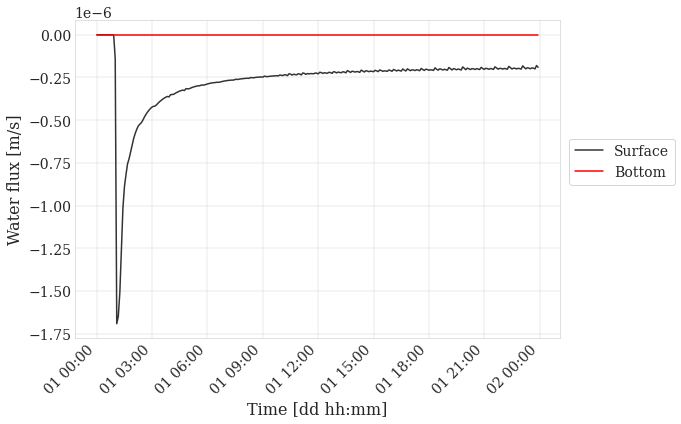

In [11]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

ds.darcyVelocity.sel(dualDepth=0, method='nearest').plot(ax=ax, label='Surface', color='0.2')
ds.darcyVelocity.sel(dualDepth=-2, method='nearest').plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Water flux [m/s]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()

Abbiamo messo un fondo impermeabile: flusso al fondo è zero; si osserva che la simulazione rimane pari a 0 poi il flusso in superficie rimane sempre più piccolo rispetto all'intensità di pioggia e poi un flusso di una lama d'acqua che pian piano si infiltra: gli strati superficiali del suolo sono tutti saturi: K=KS. il fatto che la velocità decresca è perchè i gradienti diventano sempre più piccoli, lama d'acqua diventa sempre meno profonda, la suzione in superficie più piccola e più prossima alla suzione del primo v di controllo sotto la superficie. man mano che gradiente della capillarità diventa più piccolo, il flusso diventa più controllato dalla gravità. Tutto si muove secondo gravità.

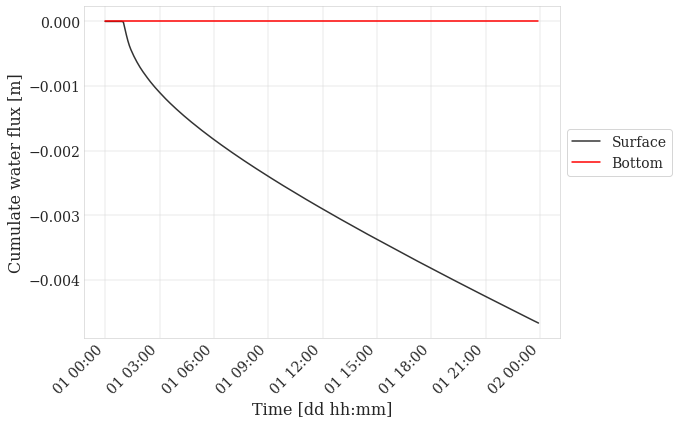

In [12]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

(ds.darcyVelocity.sel(dualDepth=0, method='nearest')*60).cumsum().plot(ax=ax, label='Surface', color='0.2')
(ds.darcyVelocity.sel(dualDepth=-2, method='nearest')*60).cumsum().plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Cumulate water flux [m]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()

Cumulata dei volumi che entrano/escono dal dominio: al fondo non esce nulla mentre in nero c'è la cumulata dei volumi infiltrati.
PEr ogni time step, dalle 00 alle 15 il volume d'acqua entrato è tra i 3-4mm. sappiamo per ogni time step tutto il v entrato fino a quell'istante.